# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = '../csv/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [3]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
X_train.shape

(5100, 58)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [5]:
# En esta celda cargá el regresor y realizá el entrenamiento
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [6]:
# Acá realizá la predicción
y_pred = tree_reg.predict(X_test)
y_test.shape

(1276,)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [7]:
# En esta celda calculá el rmse
import numpy as np
from sklearn.metrics import mean_squared_error

tree_mse = mean_squared_error(y_test, y_pred)
print("RMSE Entrenamiento: ", np.sqrt(tree_mse))

RMSE Entrenamiento:  24793.784244117607


In [8]:
type(y_test.values)

numpy.ndarray

In [9]:
y_pred

array([160000.,  65000.,  75000., ..., 163000.,  79900.,  79000.])

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(y_test.values[0:20],'o')
plt.plot(y_pred[0:20],'o')
plt.ylim(0,180000)
plt.show()

<Figure size 640x480 with 1 Axes>

__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [22]:
# Definimos las listas vacias para los valores de accuracy deseados
rmses_train = []
rmses_test = []

# Definimos la lista de valores de k que vamos a explorar
wea = [5,10,15,20,25,30]

# Generamos en loop sobre los distintos valores de k 
for m in wea:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    tree_reg = DecisionTreeRegressor(max_depth=m)
    
    # Entrenar el modelo
    tree_reg.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree_reg.predict(X_train)
    tree_mse_train = mean_squared_error(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree_reg.predict(X_test)
    tree_mse_test = mean_squared_error(y_test, y_test_pred)
    
    # Agregar la información a las listas
    rmses_train.append(tree_mse_train)
    rmses_test.append(tree_mse_test)

In [23]:
print(rmses_test)
print(rmses_train)

[700467242.1630362, 599349639.0612847, 525239556.63112247, 484522370.5217661, 459029920.3873171, 442358084.5563688, 433679789.7690789, 449563553.0836882, 452896326.1960561]
[716749156.4539038, 625127215.534502, 545553195.9542589, 493456770.54308194, 457712828.7648379, 415816124.1660786, 377829210.31303465, 336366107.8734271, 294247592.31054366]


Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

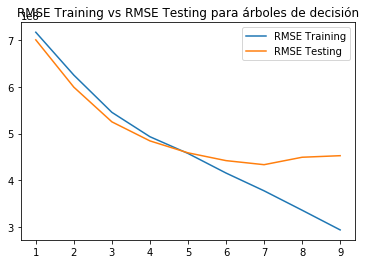

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(wea, rmses_train, label='RMSE Training')
plt.plot(wea, rmses_test, label='RMSE Testing')
# plt.ylim((0, 90000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [14]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
# entrenamos
knn_reg.fit(X_train, y_train)

# predecimos
y_pred = knn_reg.predict(X_test)

knn_mse = mean_squared_error(y_test, y_pred)
print("RMSE Entrenamiento: ", np.sqrt(knn_mse))

RMSE Entrenamiento:  21915.57668778359


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [27]:
# Calculá los cambio en el rmse en esta celda
# Definimos las listas vacias para los valores de accuracy deseados
rmses_train = []
rmses_test = []

# Definimos la lista de valores de k que vamos a explorar
wea = list(range(1, 25, 1))

# Generamos en loop sobre los distintos valores de k 
for w in wea:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    knn_reg = KNeighborsRegressor(n_neighbors=w)
    
    # Entrenar el modelo
    knn_reg.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = knn_reg.predict(X_train)
    knn_mse_train = mean_squared_error(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knn_reg.predict(X_test)
    knn_mse_test = mean_squared_error(y_test, y_test_pred)
    
    # Agregar la información a las listas
    rmses_train.append(knn_mse_train)
    rmses_test.append(knn_mse_test)

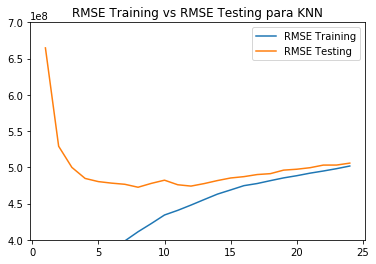

In [28]:
plt.plot(wea, rmses_train, label='RMSE Training')
plt.plot(wea, rmses_test, label='RMSE Testing')
plt.ylim((400000000, 700000000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [17]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [18]:
# Calculá en esta celda los cross_val_score
regressor = DecisionTreeRegressor(max_depth=5)
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
nmsq2rmse(score)

array([21977.27576896, 21155.588182  , 22257.52509704, 22875.28415699,
       22355.15533515, 22533.63627536, 21224.12358953, 21230.30555687,
       23244.42201964, 22361.90313433])

Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [19]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [20]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [21]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,141316.000,143624.140,2308.140
1,63500.000,79021.881,15521.881
2,126000.000,85772.492,40227.508
3,155000.000,126888.969,28111.031
4,147000.000,143624.140,3375.860
5,85500.000,85655.673,155.673
6,89000.000,86477.778,2522.222
7,105000.000,85655.673,19344.327
8,81500.000,113456.219,31956.219
9,82000.000,82922.850,922.850
